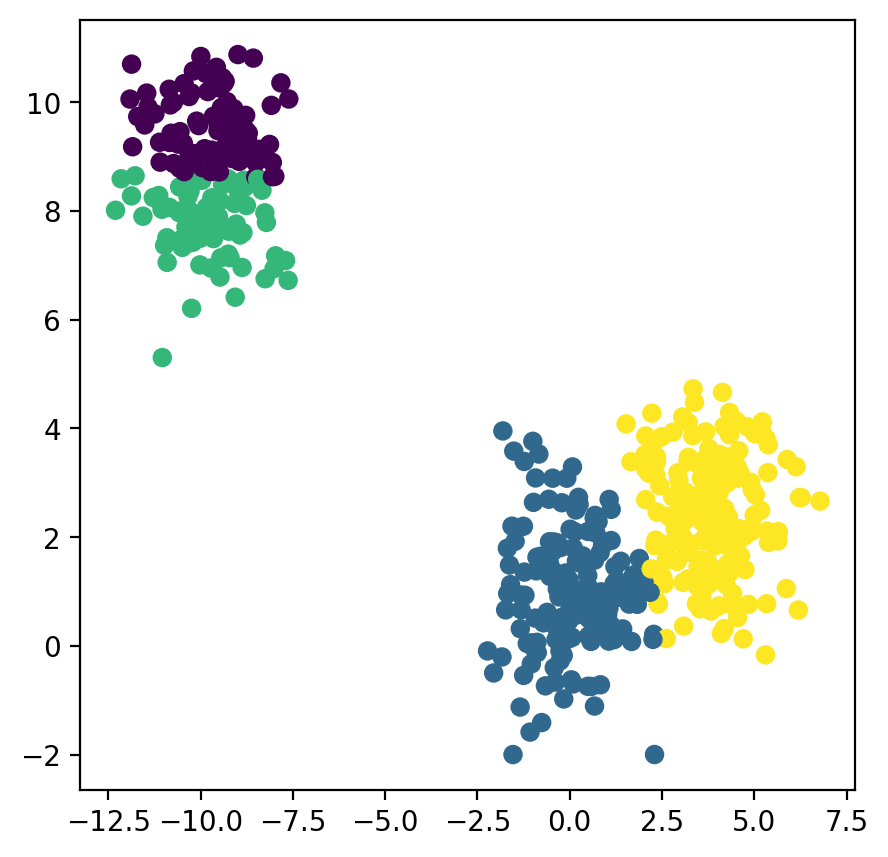

In [8]:
from cluster.utils import (
        make_clusters, 
        plot_clusters,
        plot_multipanel)

from cluster import KMeans

t_clusters, t_labels = make_clusters(k=3)

new = KMeans(4)
new.fit(t_clusters)


labels = new.predict(t_clusters)
plot_clusters(t_clusters,labels)

# print(labels)
